The aim of this small analysis is to build a predictive model by using the Support Vector Machine clasiffier.
The model will be applied to the test dataset (dowloaded from Kaggle) with patients records and predict if the patient is suffering
from the heart disease.

In [ ]:
# import all necessary modules and read csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")

In [3]:
# let's see the content of the dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
age           294 non-null int64
sex           294 non-null int64
cp            294 non-null int64
trestbps      294 non-null object
chol          294 non-null object
fbs           294 non-null object
restecg       294 non-null object
thalach       294 non-null object
exang         294 non-null object
oldpeak       294 non-null float64
slope         294 non-null object
ca            294 non-null object
thal          294 non-null object
num           294 non-null int64
dtypes: float64(1), int64(4), object(9)
memory usage: 32.2+ KB


In [5]:
# replacement of question mark by Nan
df.replace('?', np.nan,inplace=True)

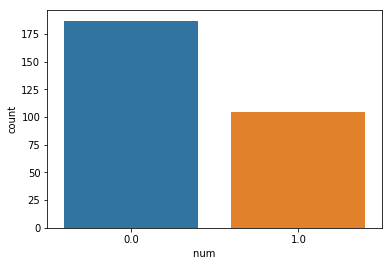

In [86]:
# distribution of the dependent variable
sns.countplot(x="num       ",data=df)

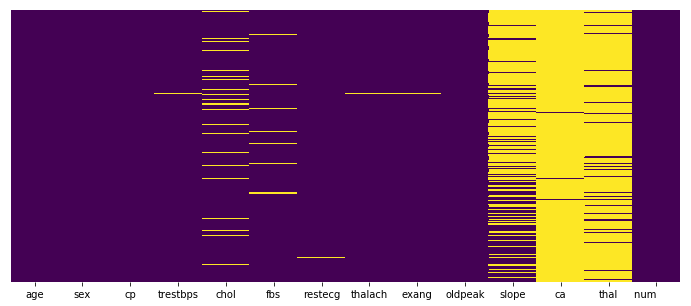

In [6]:
# let's check the column with missing data, slope, ca, thal column can not be use for the analysis...to much data is missing
plt.figure(figsize=[12,5])
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df.drop(["slope","ca","thal"],axis=1,inplace=True)

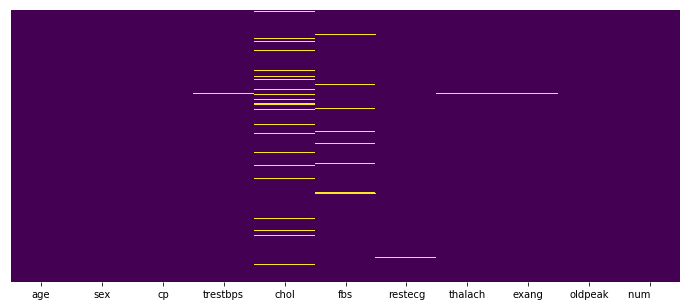

In [8]:
plt.figure(figsize=[12,5])
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
thal = df[df["thalach"].isnull() == True]
rest = df[df["restecg"].isnull() == True]
trest = df[df["trestbps"].isnull() == True]

In [16]:
print(thal)
print(rest)
print(trest)

    age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak  num       
90   48    0   2      NaN  308   0       1     NaN   NaN      2.0           0
     age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak  num       
268   55    1   1      140  295   0     NaN     136     0      0.0           1
    age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak  num       
90   48    0   2      NaN  308   0       1     NaN   NaN      2.0           0


In [18]:
df.drop(df.index[[268,90]],inplace=True)


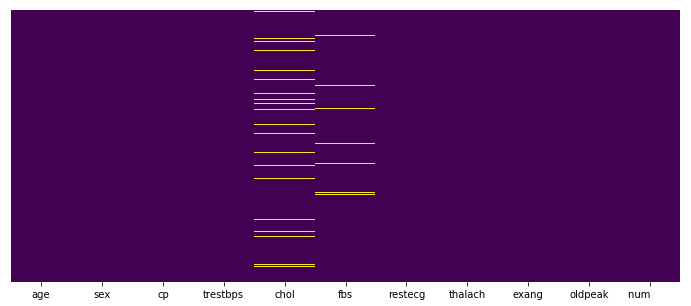

In [19]:
# two columns with missing data left
plt.figure(figsize=[12,5])
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
df = df.astype(float)

In [29]:
# get the mean values of the columns and replace the Nan values by this value
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,292.000000,292.000000,292.000000,292.000000,269.000000,284.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,47.801370,0.726027,2.993151,132.558219,250.472119,0.070423,0.215753,139.140411,0.304795,0.583219,0.359589
std,7.827276,0.446761,0.959643,17.651457,67.765207,0.256309,0.459372,23.629532,0.461111,0.907335,0.480704
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,281.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


In [34]:
df["fbs"].fillna(0.070423,inplace=True)


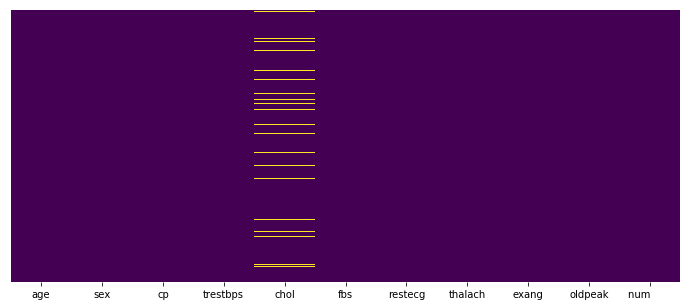

In [35]:
plt.figure(figsize=[12,5])
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
age,1.000000,0.011900,0.153994,0.244305,0.088961,0.181669,0.052100,-0.459680,0.241532,0.180738,0.156045
sex,0.011900,1.000000,0.252099,0.088311,0.032687,0.041147,-0.096108,-0.111577,0.156529,0.130192,0.268295
cp,0.153994,0.252099,1.000000,0.089286,0.148817,0.030330,-0.012227,-0.374122,0.493986,0.359013,0.519364
trestbps,0.244305,0.088311,0.089286,1.000000,0.083314,0.095117,0.013914,-0.184831,0.215036,0.207985,0.138260
chol,0.088961,0.032687,0.148817,0.083314,1.000000,0.119049,0.045375,-0.127454,0.170455,0.106966,0.209914
fbs,0.181669,0.041147,0.030330,0.095117,0.119049,1.000000,0.050438,-0.071272,0.114200,0.063207,0.162525
restecg,0.052100,-0.096108,-0.012227,0.013914,0.045375,0.050438,1.000000,0.004481,0.045392,0.033450,-0.025741
thalach,-0.459680,-0.111577,-0.374122,-0.184831,-0.127454,-0.071272,0.004481,1.000000,-0.402593,-0.303544,-0.331802
exang,0.241532,0.156529,0.493986,0.215036,0.170455,0.114200,0.045392,-0.402593,1.000000,0.631573,0.589073
oldpeak,0.180738,0.130192,0.359013,0.207985,0.106966,0.063207,0.033450,-0.303544,0.631573,1.000000,0.557522


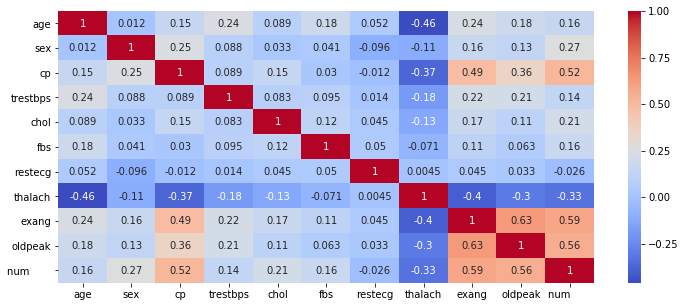

In [39]:
plt.figure(figsize=[12,5])
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [45]:
df["chol"].fillna(250.472119,inplace=True)

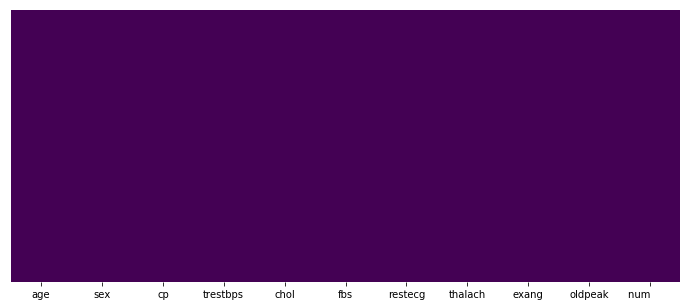

In [128]:
# let's check missing data again....it seems the dataframe has been cleaned
plt.figure(figsize=[12,5])
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [51]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'num       '],
      dtype='object')

In [130]:
# we can use the SVC algorithm to predict the dependent variable 'num'
X = df.drop('num       ',axis=1)
y = df['num       ']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

In [55]:
from sklearn.svm import SVC

In [61]:
model = SVC(gamma="auto")

In [62]:
model.fit(X_train,y_train,)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
predictions = model.predict(X_test)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print(confusion_matrix(y_test,predictions))

[[56  0]
 [32  0]]


In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78        56
         1.0       0.00      0.00      0.00        32

   micro avg       0.64      0.64      0.64        88
   macro avg       0.32      0.50      0.39        88
weighted avg       0.40      0.64      0.49        88



/home/jkohout/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jkohout/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jkohout/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [115]:
# with the default setting, the model is not doing his job very well, let's try to implement GridSearchCV class
# and find optimal parameters 
param_grid = {'C': [0.1,1, 10, 100, 1000, 10000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [118]:
grid.fit(X_train,y_train)

/home/jkohout/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6376811594202898, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6470588235294118, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6417910447761194, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6376811594202898, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6470588235294118, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6417910447761194, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ............................

[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.6268656716417911, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV]  C=1000, gamma=0.0001, kernel=rbf, score=0.7681159420289855, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV]  C=1000, gamma=0.0001, kernel=rbf, score=0.7058823529411765, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV]  C=1000, gamma=0.0001, kernel=rbf, score=0.835820895522388, total=   0.0s
[CV] C=10000, gamma=1, kernel=rbf ....................................
[CV]  C=10000, gamma=1, kernel=rbf, score=0.6376811594202898, total=   0.0s
[CV] C=10000, gamma=1, kernel=rbf ....................................
[CV]  C=10000, gamma=1, kernel=rbf, score=0.6470588235294118, total=   0.0s
[CV] C=10000, gamma=1, kernel=rbf ....................................
[CV]  C=10000, gamma=1, kernel=rbf, score=0.6417910447761194, total=   0.0s
[CV] C=10000, gamma=0.1, ker

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.9s finished
/home/jkohout/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000, 10000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [119]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [120]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [121]:
grid_predictions = grid.predict(X_test)

In [122]:
print(confusion_matrix(y_test,grid_predictions))

[[50  6]
 [10 22]]


In [123]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86        56
         1.0       0.79      0.69      0.73        32

   micro avg       0.82      0.82      0.82        88
   macro avg       0.81      0.79      0.80        88
weighted avg       0.82      0.82      0.82        88



In [124]:
cm = confusion_matrix(y_test,grid_predictions)


In [125]:
acc = (cm[0][0] + cm[1][1]) / (cm.sum()/100)

In [126]:
print("The accuracy of the model is " + str(round(acc)) + "%")

The accuracy of the model is 82.0%


The SVC model is able to predict the heart disease with apprx. 82% accuracy. 